<math xmlns="http://www.w3.org/1998/Math/MathML" alttext="sigma equals StartRoot double-struck upper E left-parenthesis upper R squared right-parenthesis minus left-bracket double-struck upper E left-parenthesis upper R right-parenthesis right-bracket squared EndRoot" display="block">
  <mrow>
    <mi>σ</mi>
    <mo>=</mo>
    <msqrt>
      <mrow>
        <mi>𝔼</mi>
        <mrow>
          <mo>(</mo>
          <msup><mi>R</mi> <mn>2</mn> </msup>
          <mo>)</mo>
        </mrow>
        <mo>-</mo>
        <msup><mrow><mo>[</mo><mi>𝔼</mi><mrow><mo>(</mo><mi>R</mi><mo>)</mo></mrow><mo>]</mo></mrow> <mn>2</mn> </msup>
      </mrow>
    </msqrt>
  </mrow>
</math>

#### Standard Deviation
1. where R and E refer to annual return and expectation, respectively. 

Adverse selection is a type of asymmetric information in which one party tries to exploit its informational advantage. This arises when sellers are better informed than buyers. This phenomenon was perfectly coined by Akerlof (1978) as “the Markets for Lemons.” Within this framework, “lemons” refer to low-quality commodities.

Consider a market with lemons and high-quality cars, and buyers know that they’re likely to buy a lemon, which lowers the equilibrium price. However, the seller is better informed whether the car is a lemon or of high quality. So, in this situation, benefit from exchange might disappear, and no transaction takes place.

Because of its complexity and opaqueness, the mortgage market in the pre-crisis era is a good example of adverse selection. Borrowers knew more about their willingness and ability to pay than lenders. Financial risk was created through the securitizations of the loans (i.e., mortgage-backed securities). From that point on, the originators of the mortgage loans knew more about the risks than those who were selling them to investors in the form of mortgage-backed securities.


In [1]:
QUANDL_API_Key = 'nD1W_jxBr5XV8QWC_N-Y'
FRED_API_Key = 'eb653e66e8ebaf3e9f40c7df32816ed7'
ALPHA_VANTAGE_Key = 'WYIFLCPADSDLDB4V'

In [2]:
import quandl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

In [5]:
oil = quandl.get("NSE/OIL", authtoken=QUANDL_API_Key,
                         start_date="1980-01-01",
                         end_date="2020-01-01")

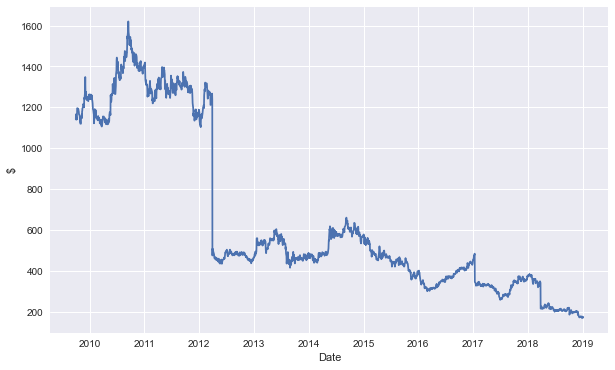

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(oil.Close)
plt.ylabel('$')
plt.xlabel('Date')
plt.show()

[*********************100%***********************]  1 of 1 completed
Date
2015-01-01    1994.989990
2015-02-01    2104.500000
2015-03-01    2067.889893
2015-04-01    2085.510010
2015-05-01    2107.389893
                 ...     
2021-08-01    4522.680176
2021-09-01    4307.540039
2021-10-01    4605.379883
2021-11-01    4567.000000
2021-12-01    4766.180176
Name: Close, Length: 84, dtype: float64


NameError: name 'plt' is not defined

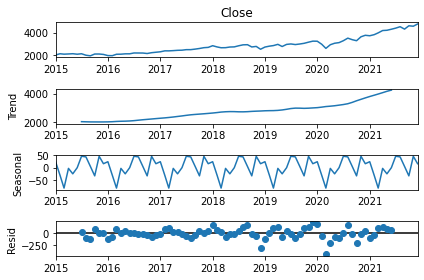

In [2]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

ticker = '^GSPC'
start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2022, 1, 1)
SP_prices = yf.download(ticker, start=start, end=end, interval='1mo').Close

print(SP_prices)

seasonal_decompose(SP_prices, period=12).plot()
plt.show()

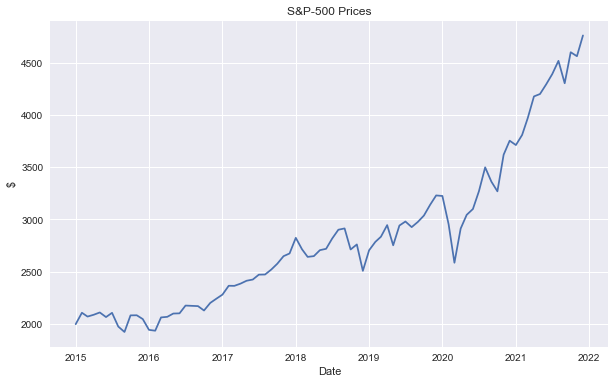

In [12]:
SP_prices
plt.figure(figsize=(10, 6))
plt.plot(SP_prices)
plt.title('S&P-500 Prices')
plt.ylabel('$')
plt.xlabel('Date')
plt.show()

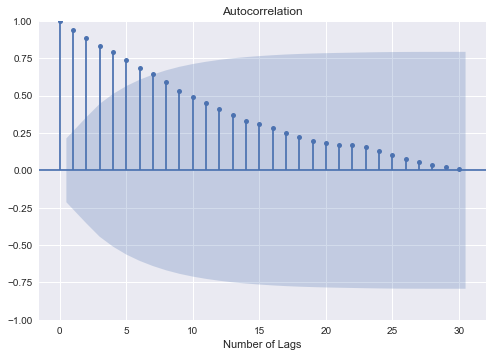

In [13]:
sm.graphics.tsa.plot_acf(SP_prices, lags=30)
plt.xlabel('Number of Lags')
plt.show()

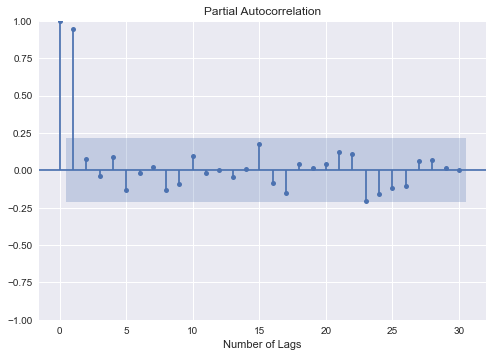

In [14]:
sm.graphics.tsa.plot_pacf(SP_prices, lags=30)
plt.xlabel('Number of Lags')
plt.show()

In [1]:
from fredapi import Fred
import statsmodels.api as sm
# 1654fe478ad7b9cecf25b053a9b621de
fred = Fred(api_key='eb653e66e8ebaf3e9f40c7df32816ed7')
energy = fred.get_series("CAPUTLG2211A2S",
                                  observation_start="2010-01-01",
                                  observation_end="2020-12-31")

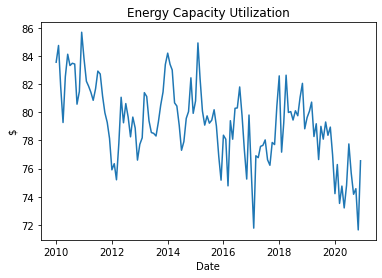

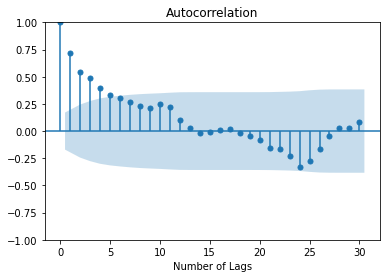

In [5]:
import matplotlib.pyplot as plt
plt.plot(energy)
plt.title('Energy Capacity Utilization')
plt.ylabel('$')
plt.xlabel('Date')
plt.show()
sm.graphics.tsa.plot_acf(energy, lags=30)
plt.xlabel('Number of Lags')
plt.show()

In [8]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

# code and plot setup
# settings
pd.options.plotting.backend = "plotly"

# sample dataframe of a wide format
np.random.seed(4); cols = list('abc')
X = np.random.randn(50,len(cols))  
df=pd.DataFrame(X, columns=cols)
df.iloc[0]=0;

# plotly figure
fig = df.plot(template = 'plotly_dark')

app = JupyterDash(__name__)
app.layout = html.Div([
    html.H1("Random datastream"),
            dcc.Interval(
            id='interval-component',
            interval=1*1000, # in milliseconds
            n_intervals=0
        ),
    dcc.Graph(id='graph'),
])

# Define callback to update graph
@app.callback(
    Output('graph', 'figure'),
    [Input('interval-component', "n_intervals")]
)
def streamFig(value):
    
    global df
    
    Y = np.random.randn(1,len(cols))  
    df2 = pd.DataFrame(Y, columns = cols)
    df = df.append(df2, ignore_index=True)#.reset_index()
    df.tail()
    df3=df.copy()
    df3 = df3.cumsum()
    fig = df3.plot(template = 'plotly_dark')
    #fig.show()
    return(fig)

app.run_server(mode='jupyterlab', port = 8090, dev_tools_ui=True, #debug=True,
              dev_tools_hot_reload =True, threaded=True)

In [11]:
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
# Load Data
df = oil.Close
# Build App
app = JupyterDash(__name__)
app.layout = html.Div([
    html.H1("JupyterDash Demo"),
    dcc.Graph(id='graph'),
    html.Label([
        "colorscale",
        dcc.Dropdown(
            id='colorscale-dropdown', clearable=False,
            value='plasma', options=[
                {'label': c, 'value': c}
                for c in px.colors.named_colorscales()
            ])
    ]),
])
# Define callback to update graph
@app.callback(
    Output('graph', 'figure'),
    [Input("colorscale-dropdown", "value")]
)
def update_figure(colorscale):
    return px.scatter(
        df, x="total_bill", y="tip", color="size",
        color_continuous_scale=colorscale,
        render_mode="webgl", title="Tips"
    )
# Run app and display result inline in the notebook
app.run_server(mode='inline')